<a href="https://colab.research.google.com/github/jhonygomez01/Bitcoin-Price-Prediction/blob/main/Predecir_Precios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,GRU

In [ ]:
#Cargar los datos
company = 'TSLA'
ticker = yf.Ticker(company)
hist = ticker.history(start = '2012-1-1', end='2020-1-1')

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,1.929333,1.966666,1.843333,1.872000,13920780,0,0
2012-01-04,1.880666,1.911333,1.833333,1.847333,9450540,0,0
2012-01-05,1.850666,1.862000,1.790000,1.808000,15081480,0,0
2012-01-06,1.813333,1.852666,1.760666,1.794000,14794305,0,0
2012-01-09,1.800000,1.832666,1.741333,1.816666,13454265,0,0
...,...,...,...,...,...,...,...
2019-12-24,27.890665,28.364666,27.512501,28.350000,120820800,0,0
2019-12-26,28.527332,28.898666,28.423332,28.729334,159724335,0,0
2019-12-27,29.000000,29.020666,28.407333,28.691999,149352405,0,0


In [ ]:
#Preparar los datos
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(hist['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(1952, 60, 1)

In [ ]:
#Contruir el modelo
model = Sequential()

model.add(GRU(units=50,return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train,epochs=25,batch_size=32)


Epoch 1/25
61/61 [==============================] - 9s 68ms/step - loss: 0.0259
Epoch 2/25
61/61 [==============================] - 4s 68ms/step - loss: 0.0032
Epoch 3/25
61/61 [==============================] - 4s 69ms/step - loss: 0.0028
Epoch 4/25
61/61 [==============================] - 4s 68ms/step - loss: 0.0025
Epoch 5/25
61/61 [==============================] - 4s 67ms/step - loss: 0.0023
Epoch 6/25
61/61 [==============================] - 4s 67ms/step - loss: 0.0021
Epoch 7/25
61/61 [==============================] - 4s 67ms/step - loss: 0.0020
Epoch 8/25
61/61 [==============================] - 4s 67ms/step - loss: 0.0020
Epoch 9/25
61/61 [==============================] - 4s 67ms/step - loss: 0.0020
Epoch 10/25
61/61 [==============================] - 4s 67ms/step - loss: 0.0020
Epoch 11/25
61/61 [==============================] - 4s 67ms/step - loss: 0.0018
Epoch 12/25
61/61 [==============================] - 4s 67ms/step - loss: 0.0018
Epoch 13/25
61/61 [==================

In [ ]:
#Cargar los datos del test
hist_test = ticker.history(start = '2020-1-1', end='2022-8-21')
actual_prices = hist_test["Close"].values

total_dataset = pd.concat((hist['Close'],hist_test['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset)-len(hist_test)-prediction_days:].values
model_inputs = scaler.transform(model_inputs.reshape(-1,1))


In [ ]:
x_test = []

for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


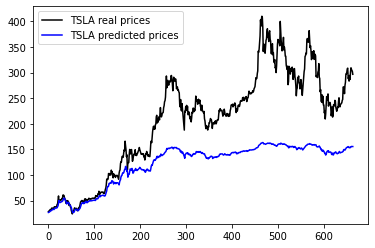

In [ ]:
plt.plot(actual_prices,color="black",label=f"{company} real prices")
plt.plot(predicted_prices,color="blue",label=f"{company} predicted prices")
plt.legend()
plt.show()

In [ ]:
rentability = 1
for i in range(1,len(actual_prices)):
  if predicted_prices[i] > actual_prices[i-1]:
    rentability*= actual_prices[i]/actual_prices[i-1]

print((rentability-1)*100,"%")

3.3343448030232814 %
